<h1><center><font size="6">Modeling and Feature Selection 
Notebook</font></center></h1>

# Contents

- <a href='#1'>Importing Packages</a>
- <a href='#2'>Baseline Model</a>  
    - <a href='#21'>Logistic Regression</a>
    - <a href='#22'>Random Forest Classifier</a>
    - <a href='#23'>Decision Tree Classifier</a>
    - <a href='#24'>K-Nearest Neighbors</a>
    - <a href='#25'>Gaussian Naive Bayes Classifier</a>
    - <a href='#26'>Linear Discriminant Analysis</a>
    - <a href='#27'>AdaBoost Classifier</a>
    - <a href='#28'>Gradient Boosting Classifier</a>
    - <a href='#29'>XGBoost Classifier</a>
- <a href='#3'>Model with Engineered Features</a>
    - <a href='#31'>Logistic Regression</a>
    - <a href='#32'>Random Forest Classifier</a>
    - <a href='#33'>Decision Tree Classifier</a>
    - <a href='#34'>K-Nearest Neighbors</a>
    - <a href='#35'>Gaussian Naive Bayes Classifier</a>
    - <a href='#36'>Linear Discriminant Analysis</a>
    - <a href='#37'>AdaBoost Classifier</a>
    - <a href='#38'>Gradient Boosting Classifier</a>
    - <a href='#39'>XGBoost Classifier</a>
- <a href='#4'>Discussion of Evaluation Metrics</a>
- <a href='#5'>Feature Selection</a>
    - <a href='#51'>Decision Tree Feature Importance</a>
    - <a href='#52'>Random Forest Feature Importance</a>
    - <a href='#53'>XGBoost Feature Importance</a>
    - <a href='#54'>Recursive Feature Elimination with Cross-Validation</a>
    - <a href='#55'>Feature Selection Discussion</a>
- <a href='#6'>New Baseline Model</a>
    - <a href='#61'>Logistic Regression</a>
    - <a href='#62'>Random Forest Classifier</a>
    - <a href='#63'>AdaBoost Classifier</a>
    - <a href='#64'>Gradient Boosting Classifier</a>
    - <a href='#65'>XGBoost Classifier</a>
    - <a href='#66'>Evaluation Metrics</a>


# <a id='1'>Importing Packages</a>

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter
plt.style.use("fivethirtyeight")
import pickle

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report,balanced_accuracy_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

%reload_ext autoreload
%autoreload 2
from utils import *

# <a id='2'>Baseline Model</a>

## Importing Pickles

In [2]:
pickle_in = open("../data/pickles/training_cleaned.pickle","rb")
train = pickle.load(pickle_in)
pickle_in = open("../data/pickles/validate_cleaned.pickle","rb")
validate = pickle.load(pickle_in)

In [3]:
train.head()

,limit,gender,education,marriage,age,behind1,behind2,behind3,behind4,behind5,...,billed4,billed5,billed6,paid1,paid2,paid3,paid4,paid5,paid6,default
0,1790.26,2,2,1,44,0,0,0,0,0,...,800.60,847.12,981.81,107.99,179.13,107.42,107.42,179.03,33.08,0
1,5728.83,2,3,1,46,-1,-1,-1,0,-1,...,147.77,143.04,30.15,83.89,173.87,35.81,143.04,30.15,942.14,0
2,3580.52,2,2,1,47,-1,-1,-1,-1,-1,...,224.50,-14.18,-14.18,238.68,0.00,224.50,0.00,0.00,0.00,1
3,6086.88,2,2,1,29,0,0,0,0,0,...,2288.06,1557.71,1575.25,80.02,89.26,92.56,60.26,68.07,75.58,0
4,5370.78,2,1,2,33,-2,-2,-2,-2,-2,...,1198.01,995.38,80.96,966.99,1171.37,1198.58,995.67,80.96,6067.73,0


In [18]:
validate.head()

,limit,gender,education,marriage,age,behind1,behind2,behind3,behind4,behind5,...,billed4,billed5,billed6,paid1,paid2,paid3,paid4,paid5,paid6,default
0,1074.16,1,2,2,25,0,0,0,0,0,...,450.43,491.10,530.92,53.71,71.61,53.71,53.71,53.71,71.61,0
1,5370.78,2,1,2,26,0,0,0,0,0,...,3637.13,2783.53,2766.45,160.62,151.64,113.18,94.78,95.56,95.56,0
2,2506.36,2,3,1,32,0,0,0,0,0,...,2497.52,2510.34,2513.96,87.04,111.43,107.42,87.29,89.51,91.45,0
3,4654.68,1,3,2,49,0,0,0,0,0,...,605.04,402.31,248.63,57.65,64.74,251.14,0.97,251.03,157.83,0
4,1790.26,2,2,2,36,0,0,0,0,0,...,700.85,726.67,696.02,71.61,53.71,35.81,64.45,0.00,35.81,1


## Preparing Datasets for Modeling

### Identify Feature and Target Vectors

In [14]:
X_train = train.drop(["default"], axis=1)
y_tr = train["default"]
X_validate = validate.drop(["default"], axis=1)
y_val = validate["default"]


In [21]:
X_train.columns

Index(['limit', 'gender', 'education', 'marriage', 'age', 'behind1', 'behind2',
       'behind3', 'behind4', 'behind5', 'behind6', 'billed1', 'billed2',
       'billed3', 'billed4', 'billed5', 'billed6', 'paid1', 'paid2', 'paid3',
       'paid4', 'paid5', 'paid6'],
      dtype='object')

### Standardize Features for Logistic Regression

In [22]:
# # Grab indices of columns for creating dummy variables and create dataframe with dummy variables
dum_feat = X_train[['gender', 'education', 'marriage']]
dum_index = dum_feat.columns
tr_dum = pd.get_dummies(data=dum_feat, columns=dum_index, drop_first=True, prefix=['sex', 'edu', 'mar'])
cont_feat = X_train.drop(['gender', 'education', 'marriage'], axis=1)
X_train_dum = cont_feat.join(tr_dum)
X_train_dum.head()

,limit,age,behind1,behind2,behind3,behind4,behind5,behind6,billed1,billed2,...,paid3,paid4,paid5,paid6,sex_2,edu_2,edu_3,edu_4,mar_2,mar_3
0,1790.26,44,0,0,0,0,0,0,1631.93,1500.45,...,107.42,107.42,179.03,33.08,1,1,0,0,0,0
1,5728.83,46,-1,-1,-1,0,-1,-1,891.69,83.71,...,35.81,143.04,30.15,942.14,1,0,1,0,0,0
2,3580.52,47,-1,-1,-1,-1,-1,-2,238.68,238.68,...,224.50,0.00,0.00,0.00,1,1,0,0,0,0
3,6086.88,29,0,0,0,0,0,0,2831.87,2240.51,...,92.56,60.26,68.07,75.58,1,1,0,0,0,0
4,5370.78,33,-2,-2,-2,-2,-2,-2,873.40,961.26,...,1198.58,995.67,80.96,6067.73,1,0,0,0,1,0


In [23]:
dum_feat2 = X_validate[['gender', 'education', 'marriage']]
dum_index2 = dum_feat2.columns
val_dum = pd.get_dummies(data=dum_feat2, columns=dum_index2, drop_first=True, prefix=['sex', 'edu', 'mar'])
cont_feat2 = X_validate.drop(['gender', 'education', 'marriage'], axis=1)
X_validate_dum = cont_feat2.join(val_dum)
X_validate_dum.head()

,limit,age,behind1,behind2,behind3,behind4,behind5,behind6,billed1,billed2,...,paid3,paid4,paid5,paid6,sex_2,edu_2,edu_3,edu_4,mar_2,mar_3
0,1074.16,25,0,0,0,0,0,0,317.38,360.27,...,53.71,53.71,53.71,71.61,0,1,0,0,1,0
1,5370.78,26,0,0,0,0,0,0,4895.86,4498.96,...,113.18,94.78,95.56,95.56,1,0,0,0,1,0
2,2506.36,32,0,0,0,0,0,0,2510.73,2473.42,...,107.42,87.29,89.51,91.45,1,0,1,0,0,0
3,4654.68,49,0,0,0,0,0,-1,740.38,678.72,...,251.14,0.97,251.03,157.83,0,0,1,0,1,0
4,1790.26,36,0,0,0,0,0,2,3373.85,1705.58,...,35.81,64.45,0.00,35.81,1,1,0,0,1,0


In [8]:
scaler = StandardScaler().fit(X_train_dum)
X_tr_dum = scaler.transform(X_train_dum)
X_val_dum = scaler.transform(X_validate_dum)

### Standardize for all other classification models

In [9]:
scaler2 = StandardScaler().fit(X_train)
X_tr = scaler2.transform(X_train)
X_val = scaler2.transform(X_validate)

## <a id='21'>Logistic Regression</a>

In [19]:
logreg = LogisticRegression(solver="liblinear", random_state=42).fit(X_tr_dum, y_tr)
y_pred_log_tr = logreg.predict(X_tr_dum)
y_pred_log_val = logreg.predict(X_val_dum)
get_metric(X_tr_dum, y_tr, X_val_dum, y_val, y_pred_log_tr, y_pred_log_val, logreg)

Training Accuracy:  0.8116666666666666
Validation Accuracy:  0.8115
Training F1 Score:  0.37272006344171293
Validation F1 Score:  0.36065573770491804
Training AUC Score:  0.7259329931599476
Validation AUC Score:  0.7268541546183307
Training Recall Score:  0.25236254295532645
Validation Recall Score:  0.24295506473724296
Training Precision Score:  0.7125530624620983
Validation Precision Score:  0.6995614035087719
Training Average Precision Score:  0.5146912859774845
Validation Average Precision Score:  0.48682918007780884


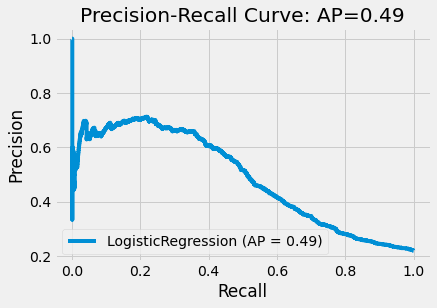

In [12]:
pr_curve(X_val_dum, y_val, logreg)

## <a id='22'>Random Forest Classifier</a>

In [20]:
rfc = RandomForestClassifier().fit(X_tr, y_tr)
y_pred_rfc_tr = rfc.predict(X_tr)
y_pred_rfc_val = rfc.predict(X_val)
get_metric(X_tr, y_tr, X_val, y_val, y_pred_rfc_tr, y_pred_rfc_val, rfc)

Training Accuracy:  0.9994761904761905
Validation Accuracy:  0.8148333333333333
Training F1 Score:  0.9988180939078113
Validation F1 Score:  0.46146388754241396
Training AUC Score:  0.9999984756430895
Validation AUC Score:  0.7546377325691079
Training Recall Score:  0.9982817869415808
Validation Recall Score:  0.3625285605483625
Training Precision Score:  0.9993549774242099
Validation Precision Score:  0.6346666666666667
Training Average Precision Score:  0.9999944011307776
Validation Average Precision Score:  0.5134446959768434


## <a id='23'>Decision Tree Classifier</a>

In [21]:
dtc = DecisionTreeClassifier().fit(X_tr, y_tr)
y_pred_dtc_tr = dtc.predict(X_tr)
y_pred_dtc_val = dtc.predict(X_val)
get_metric(X_tr, y_tr, X_val, y_val, y_pred_dtc_tr, y_pred_dtc_val, dtc)

Training Accuracy:  0.9994761904761905
Validation Accuracy:  0.7306666666666667
Training F1 Score:  0.9988173314697344
Validation F1 Score:  0.39925650557620823
Training AUC Score:  0.9999991983985211
Validation AUC Score:  0.6152570567161589
Training Recall Score:  0.9976374570446735
Validation Recall Score:  0.408987052551409
Training Precision Score:  1.0
Validation Precision Score:  0.3899782135076253
Training Average Precision Score:  0.9999948438742888
Validation Average Precision Score:  0.2890901215515269


## <a id='24'>K-Nearest Neighbors</a>

In [22]:
knn = KNeighborsClassifier().fit(X_tr, y_tr)
y_pred_knn_tr = knn.predict(X_tr)
y_pred_knn_val = knn.predict(X_val)
get_metric(X_tr, y_tr, X_val, y_val, y_pred_knn_tr, y_pred_knn_val, knn)

Training Accuracy:  0.8434285714285714
Validation Accuracy:  0.798
Training F1 Score:  0.5730978966502207
Validation F1 Score:  0.4470802919708029
Training AUC Score:  0.8809067910415752
Validation AUC Score:  0.7043270500262349
Training Recall Score:  0.4740120274914089
Validation Recall Score:  0.3731911652703732
Training Precision Score:  0.7245567957977675
Validation Precision Score:  0.5574516496018203
Training Average Precision Score:  0.6385014470162054
Validation Average Precision Score:  0.41660496800363034


## <a id='25'>Gaussian Naive Bayes Classifier</a>

In [23]:
gnb = GaussianNB().fit(X_tr, y_tr)
y_pred_gnb_tr = gnb.predict(X_tr)
y_pred_gnb_val = gnb.predict(X_val)
get_metric(X_tr, y_tr, X_val, y_val, y_pred_gnb_tr, y_pred_gnb_val, gnb)

Training Accuracy:  0.7296190476190476
Validation Accuracy:  0.724
Training F1 Score:  0.509248055315471
Validation F1 Score:  0.4984857662023017
Training AUC Score:  0.737431296182758
Validation AUC Score:  0.7365527570465602
Training Recall Score:  0.6327319587628866
Validation Recall Score:  0.6268088347296268
Training Precision Score:  0.4260919872722013
Validation Precision Score:  0.41377576671694316
Training Average Precision Score:  0.5011536350350296
Validation Average Precision Score:  0.48098077890037705


## <a id='26'>Linear Discriminant Analysis</a>

In [24]:
lda = LinearDiscriminantAnalysis().fit(X_tr, y_tr)
y_pred_lda_tr = lda.predict(X_tr)
y_pred_lda_val = lda.predict(X_val)
get_metric(X_tr, y_tr, X_val, y_val, y_pred_lda_tr, y_pred_lda_val, lda)

Training Accuracy:  0.8129047619047619
Validation Accuracy:  0.8103333333333333
Training F1 Score:  0.3900015525539512
Validation F1 Score:  0.3677777777777778
Training AUC Score:  0.7198676689996687
Validation AUC Score:  0.7182891993881733
Training Recall Score:  0.2697594501718213
Validation Recall Score:  0.2520944402132521
Training Precision Score:  0.7036414565826331
Validation Precision Score:  0.6796714579055442
Training Average Precision Score:  0.5100387553210725
Validation Average Precision Score:  0.4804759234161194


## <a id='27'>AdaBoost Classifier</a>

In [25]:
abc = AdaBoostClassifier().fit(X_tr, y_tr)
y_pred_abc_tr = abc.predict(X_tr)
y_pred_abc_val = abc.predict(X_val)
get_metric(X_tr, y_tr, X_val, y_val, y_pred_abc_tr, y_pred_abc_val, abc)

Training Accuracy:  0.820047619047619
Validation Accuracy:  0.8156666666666667
Training F1 Score:  0.45176265776875096
Validation F1 Score:  0.4257528556593977
Training AUC Score:  0.7878643357567455
Validation AUC Score:  0.77515818493602
Training Recall Score:  0.33440721649484534
Validation Recall Score:  0.31226199543031224
Training Precision Score:  0.6960214573088959
Validation Precision Score:  0.6688417618270799
Training Average Precision Score:  0.5573463204971407
Validation Average Precision Score:  0.5234298793408361


## <a id='28'> Gradient Boosting Classifier</a>

In [26]:
gbc = GradientBoostingClassifier().fit(X_tr, y_tr)
y_pred_gbc_tr = gbc.predict(X_tr)
y_pred_gbc_val = gbc.predict(X_val)
get_metric(X_tr, y_tr, X_val, y_val, y_pred_gbc_tr, y_pred_gbc_val, gbc)

Training Accuracy:  0.8285714285714286
Validation Accuracy:  0.8208333333333333
Training F1 Score:  0.501799058953778
Validation F1 Score:  0.4680851063829787
Training AUC Score:  0.8092082366680796
Validation AUC Score:  0.780931149030611
Training Recall Score:  0.3893900343642612
Validation Recall Score:  0.3602437166793602
Training Precision Score:  0.7054474708171207
Validation Precision Score:  0.6680790960451978
Training Average Precision Score:  0.6077423441714833
Validation Average Precision Score:  0.5459245247705501


In [ ]:
pr_curve(X_val, y_val, gbc)

## <a id='29'>XGBoost Classifier</a>

In [29]:
xgb = XGBClassifier().fit(X_tr, y_tr)
y_pred_xgb_tr = xgb.predict(X_tr)
y_pred_xgb_val = xgb.predict(X_val)
get_metric(X_tr, y_tr, X_val, y_val, y_pred_xgb_tr, y_pred_xgb_val, xgb)

[11:29:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.8923333333333333
Validation Accuracy:  0.8168333333333333
Training F1 Score:  0.7043284948345757
Validation F1 Score:  0.4693384838242395
Training AUC Score:  0.9532041877133048
Validation AUC Score:  0.7651917093040317
Training Recall Score:  0.5783934707903781
Validation Recall Score:  0.37014470677837014
Training Precision Score:  0.9003677699765965
Validation Precision Score:  0.6411609498680739
Training Average Precision Score:  0.874001157693581
Validation Average Precision Score:  0.5184884548633066


## Evaluation Metrics Summary

In [34]:
data = {'Accuracy': [accuracy(y_val, y_pred_log_val), 
                     accuracy(y_val, y_pred_rfc_val), 
                     accuracy(y_val, y_pred_dtc_val), 
                     accuracy(y_val, y_pred_knn_val), 
                     accuracy(y_val, y_pred_gnb_val), 
                     accuracy(y_val, y_pred_lda_val), 
                     accuracy(y_val, y_pred_abc_val), 
                     accuracy(y_val, y_pred_gbc_val),
                     accuracy(y_val, y_pred_xgb_val)],
        'F1 Score': [f1(y_val, y_pred_log_val), 
                     f1(y_val, y_pred_rfc_val), 
                     f1(y_val, y_pred_dtc_val), 
                     f1(y_val, y_pred_knn_val), 
                     f1(y_val, y_pred_gnb_val), 
                     f1(y_val, y_pred_lda_val), 
                     f1(y_val, y_pred_abc_val), 
                     f1(y_val, y_pred_gbc_val),
                     f1(y_val, y_pred_xgb_val)],
        'Recall': [recall(y_val, y_pred_log_val), 
                   recall(y_val, y_pred_rfc_val), 
                   recall(y_val, y_pred_dtc_val), 
                   recall(y_val, y_pred_knn_val), 
                   recall(y_val, y_pred_gnb_val), 
                   recall(y_val, y_pred_lda_val), 
                   recall(y_val, y_pred_abc_val),
                   recall(y_val, y_pred_gbc_val),
                   recall(y_val, y_pred_xgb_val)],
        'Precision': [precision(y_val, y_pred_log_val), 
                      precision(y_val, y_pred_rfc_val), 
                      precision(y_val, y_pred_dtc_val), 
                      precision(y_val, y_pred_knn_val), 
                      precision(y_val, y_pred_gnb_val),
                      precision(y_val, y_pred_lda_val), 
                      precision(y_val, y_pred_abc_val),
                      precision(y_val, y_pred_gbc_val),
                      precision(y_val, y_pred_xgb_val)],
        'PR AUC': [aps(X_val_dum, y_val, logreg),
                   aps(X_val, y_val, rfc),
                   aps(X_val, y_val, dtc),
                   aps(X_val, y_val, knn),
                   aps(X_val, y_val, gnb),
                   aps(X_val, y_val, lda),
                   aps(X_val, y_val, abc),
                   aps(X_val, y_val, gbc),
                   aps(X_val, y_val, xgb)]}
baseline = pd.DataFrame(data=data, index = ['Logistic Regression', 
                                          'Random Forest Classifier', 
                                          'Decision Tree Classifier', 
                                          'K-Nearest Neighbors', 
                                          'Gaussian Naive Bayes', 
                                          'Linear Discriminant Analysis', 
                                          'AdaBoost Classifier', 
                                          'Gradient Boosting Classifier',
                                          'XGBoost Classifier'])

In [35]:
baseline

,Accuracy,F1 Score,Recall,Precision,PR AUC
Logistic Regression,0.811500,0.360656,0.242955,0.699561,0.486829
Random Forest Classifier,0.814833,0.461464,0.362529,0.634667,0.513445
Decision Tree Classifier,0.730667,0.399257,0.408987,0.389978,0.289090
K-Nearest Neighbors,0.798000,0.447080,0.373191,0.557452,0.416605
Gaussian Naive Bayes,0.724000,0.498486,0.626809,0.413776,0.480981
Linear Discriminant Analysis,0.810333,0.367778,0.252094,0.679671,0.480476
AdaBoost Classifier,0.815667,0.425753,0.312262,0.668842,0.523430
Gradient Boosting Classifier,0.820833,0.468085,0.360244,0.668079,0.545925
XGBoost Classifier,0.816833,0.469338,0.370145,0.641161,0.518488


In [57]:
baseline.to_csv("../data/baseline.csv")

** Initial Analysis :**

In imbalanced datasets, we don't want to use accuracy as our gold standard metric since it is easy to get a high accuracy score by simply classifying all observations as the majority class.

ROC AUC score is equivalent to calculating the rank correlation between predictions and targets, i.e. how good at ranking predictions the model is.  It tells us what is the probability that a positive instance randomly chosen is ranked higher than a negative instance randomly chosen.  Generally, the ROC AUC is not used for imbalanced datasets because the FPR for highly imbalanced datasets is pulled down to a large number of true negatives.

With the F1 score, it combines both recall and prevision into one metric by calculating the harmonic mean.  It is worth noting that the F1 score is a special case of the F-beta score, where 1 indicates that we care about recall and precision equally.  For a F2 score, we care about more recall more than precision, in fact, twice as much.Both F1 score and acuracy is calculated on the predicted classes not the prediction scores.  We can adjust the threshold to finetune the F1 score, but accuracy also depends on the threshold.

PR AUC score shows the tradeoff between precision and recall at every threshold, where a high score or area represents both high recall and precision.  High precision relates to a low FPR, and high recall relates to a low FNR.  A high score means that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

- To be expected, Random Forest and Decision Tree is overfit with high training accuracy and much lower validation accuracy.
- Tree-based and ensemble classifiers have the most potential with the highest PR AUC scores:  Random Forest, AdaBoost, Gradient Boosting, XGBoost


# <a id='3'>Model with Engineered Features</a>

## Importing Pickles

In [2]:
pickle_in = open("../data/pickles/training_features.pickle","rb")
train2 = pickle.load(pickle_in)
pickle_in = open("../data/pickles/validate_features.pickle","rb")
validate2 = pickle.load(pickle_in)

In [3]:
train2.columns

Index(['limit', 'gender', 'education', 'marriage', 'age', 'behind1', 'behind2',
       'behind3', 'behind4', 'behind5', 'behind6', 'billed1', 'billed2',
       'billed3', 'billed4', 'billed5', 'billed6', 'paid1', 'paid2', 'paid3',
       'paid4', 'paid5', 'paid6', 'default', 'age_bin', 'avail6', 'avail5',
       'avail4', 'avail3', 'avail2', 'avail1', 'avg_av', 'delayed', 'latemths',
       'pperb1', 'pperb2', 'pperb3', 'pperb4', 'pperb5'],
      dtype='object')

In [4]:
validate2.head()

,limit,gender,education,marriage,age,behind1,behind2,behind3,behind4,behind5,...,avail2,avail1,avg_av,delayed,latemths,pperb1,pperb2,pperb3,pperb4,pperb5
0,1073.98,1,2,2,25,0,0,0,0,0,...,0.664603,0.704529,0.602049,0,0,0.149080,0.172701,0.119238,0.109362,0.101162
1,5369.92,2,1,2,26,0,0,0,0,0,...,0.162326,0.088426,0.293714,0,0,0.035703,0.036294,0.031117,0.034048,0.034544
2,2505.96,2,3,1,32,0,0,0,0,0,...,0.013141,-0.001744,0.005218,0,0,0.035192,0.045412,0.043010,0.034774,0.035607
3,4653.93,1,3,2,49,0,0,0,0,0,...,0.854186,0.840939,0.883482,0,0,0.084938,0.111806,0.415082,0.002411,1.009654
4,1789.97,2,2,2,36,0,0,0,0,0,...,0.047297,-0.884562,0.188225,1,1,0.041987,0.035410,0.051089,0.088693,0.000000


## Preparing Datasets for Modeling

In [5]:
X_train2 = train2.drop(["default"], axis=1)
y_tr = train2["default"]
X_validate2 = validate2.drop(["default"], axis=1)
y_val = validate2["default"]

In [6]:
# # Grab indices of columns for creating dummy variables and create dataframe with dummy variables
dum_feat = X_train2[['gender', 'education', 'marriage', 'age_bin']]
dum_index = dum_feat.columns
tr_dum = pd.get_dummies(data=dum_feat, columns=dum_index, drop_first=True, prefix=['sex', 'edu', 'mar', 'agebin'])
cont_feat = X_train2.drop(['gender', 'education', 'marriage', 'age_bin'], axis=1)
X_train2_dum = cont_feat.join(tr_dum)
X_train2_dum.head()

,limit,age,behind1,behind2,behind3,behind4,behind5,behind6,billed1,billed2,...,pperb4,pperb5,sex_2,edu_2,edu_3,edu_4,mar_2,mar_3,agebin_2,agebin_3
0,1789.97,44,0,0,0,0,0,0,1631.67,1500.21,...,0.126803,0.182344,1,1,0,0,0,0,1,0
1,5727.92,46,-1,-1,-1,0,-1,-1,891.55,83.70,...,1.000000,1.000000,1,0,1,0,0,0,1,0
2,3579.95,47,-1,-1,-1,-1,-1,-2,238.64,238.64,...,-0.000000,-0.000000,1,1,0,0,0,0,1,0
3,6085.91,29,0,0,0,0,0,0,2831.42,2240.15,...,0.038685,0.043206,1,1,0,0,0,0,0,0
4,5369.92,33,-2,-2,-2,-2,-2,-2,873.26,961.11,...,1.000281,1.000000,1,0,0,0,1,0,1,0


In [7]:
dum_feat2 = X_validate2[['gender', 'education', 'marriage', 'age_bin']]
dum_index2 = dum_feat2.columns
val_dum = pd.get_dummies(data=dum_feat2, columns=dum_index2, drop_first=True, prefix=['sex', 'edu', 'mar', 'agebin'])
cont_feat2 = X_validate2.drop(['gender', 'education', 'marriage', 'age_bin'], axis=1)
X_validate2_dum = cont_feat2.join(val_dum)
X_validate2_dum.head()

,limit,age,behind1,behind2,behind3,behind4,behind5,behind6,billed1,billed2,...,pperb4,pperb5,sex_2,edu_2,edu_3,edu_4,mar_2,mar_3,agebin_2,agebin_3
0,1073.98,25,0,0,0,0,0,0,317.33,360.21,...,0.109362,0.101162,0,1,0,0,1,0,0,0
1,5369.92,26,0,0,0,0,0,0,4895.08,4498.24,...,0.034048,0.034544,1,0,0,0,1,0,0,0
2,2505.96,32,0,0,0,0,0,0,2510.33,2473.03,...,0.034774,0.035607,1,0,1,0,0,0,1,0
3,4653.93,49,0,0,0,0,0,-1,740.26,678.61,...,0.002411,1.009654,0,0,1,0,1,0,1,0
4,1789.97,36,0,0,0,0,0,2,3373.31,1705.31,...,0.088693,0.000000,1,1,0,0,1,0,1,0


In [8]:
scaler = StandardScaler().fit(X_train2_dum)
X_tr2_dum = scaler.transform(X_train2_dum)
X_val2_dum = scaler.transform(X_validate2_dum)

In [9]:
scaler2 = StandardScaler().fit(X_train2)
X_tr2 = scaler2.transform(X_train2)
X_val2 = scaler2.transform(X_validate2)

## <a id='31'>Logistic Regression</a>

In [32]:
logreg2 = LogisticRegression(solver="liblinear", random_state=42).fit(X_tr2_dum, y_tr)
y_pred_log_tr2 = logreg2.predict(X_tr2_dum)
y_pred_log_val2 = logreg2.predict(X_val2_dum)
get_metric(X_tr2_dum, y_tr, X_val2_dum, y_val, y_pred_log_tr2, y_pred_log_val2, logreg2)


Training Accuracy:  0.8107142857142857
Validation Accuracy:  0.8086666666666666
Training F1 Score:  0.4201312910284464
Validation F1 Score:  0.3970588235294118
Training AUC Score:  0.7599299762999296
Validation AUC Score:  0.7562249848920163
Training Recall Score:  0.30927835051546393
Validation Recall Score:  0.2878903274942879
Training Precision Score:  0.654843110504775
Validation Precision Score:  0.6395939086294417
Training Average Precision Score:  0.5204140223018529
Validation Average Precision Score:  0.499330395941948


## <a id='32'>Random Forest Classifier</a>

In [33]:
rfc2 = RandomForestClassifier().fit(X_tr2, y_tr)
y_pred_rfc_tr2 = rfc2.predict(X_tr2)
y_pred_rfc_val2 = rfc2.predict(X_val2)
get_metric(X_tr2, y_tr, X_val2, y_val, y_pred_rfc_tr2, y_pred_rfc_val2, rfc2)


Training Accuracy:  0.9994761904761905
Validation Accuracy:  0.816
Training F1 Score:  0.998817839871037
Validation F1 Score:  0.4682080924855492
Training AUC Score:  0.9999973586574221
Validation AUC Score:  0.7550941813585273
Training Recall Score:  0.9980670103092784
Validation Recall Score:  0.37014470677837014
Training Precision Score:  0.99956979995698
Validation Precision Score:  0.6369593709043251
Training Average Precision Score:  0.9999905992889674
Validation Average Precision Score:  0.5097551501882955


## <a id='33'>Decision Tree Classifier</a>

In [34]:
dtc2 = DecisionTreeClassifier().fit(X_tr2, y_tr)
y_pred_dtc_tr2 = dtc2.predict(X_tr2)
y_pred_dtc_val2 = dtc2.predict(X_val2)
get_metric(X_tr2, y_tr, X_val2, y_val, y_pred_dtc_tr2, y_pred_dtc_val2, dtc2)

Training Accuracy:  0.9994761904761905
Validation Accuracy:  0.7241666666666666
Training F1 Score:  0.9988173314697344
Validation F1 Score:  0.39132033835969104
Training AUC Score:  0.9999991983985211
Validation AUC Score:  0.6100286950130737
Training Recall Score:  0.9976374570446735
Validation Recall Score:  0.4051789794364052
Training Precision Score:  1.0
Validation Precision Score:  0.3783783783783784
Training Average Precision Score:  0.9999948438742888
Validation Average Precision Score:  0.2838433481972875


## <a id='34'>K-Nearest Neighbors</a>

In [35]:
knn2 = KNeighborsClassifier().fit(X_tr2, y_tr)
y_pred_knn_tr2 = knn2.predict(X_tr2)
y_pred_knn_val2 = knn2.predict(X_val2)
get_metric(X_tr2, y_tr, X_val2, y_val, y_pred_knn_tr2, y_pred_knn_val2, knn2)


Training Accuracy:  0.841
Validation Accuracy:  0.7888333333333334
Training F1 Score:  0.5699935608499678
Validation F1 Score:  0.4190738193489225
Training AUC Score:  0.8817846629299948
Validation AUC Score:  0.6952693283475497
Training Recall Score:  0.47530068728522334
Validation Recall Score:  0.3480578827113481
Training Precision Score:  0.7118044387262785
Validation Precision Score:  0.5264976958525346
Training Average Precision Score:  0.63781139593604
Validation Average Precision Score:  0.40223413281205345


## <a id='35'>Gaussian Naive Bayes Classifier</a>

In [36]:
gnb2 = GaussianNB().fit(X_tr2, y_tr)
y_pred_gnb_tr2 = gnb2.predict(X_tr2)
y_pred_gnb_val2 = gnb2.predict(X_val2)
get_metric(X_tr2, y_tr, X_val2, y_val, y_pred_gnb_tr2, y_pred_gnb_val2, gnb2)


Training Accuracy:  0.27014285714285713
Validation Accuracy:  0.2783333333333333
Training F1 Score:  0.37109679537154816
Validation F1 Score:  0.37409655969933503
Training AUC Score:  0.7308097525832068
Validation AUC Score:  0.7323442147106507
Training Recall Score:  0.9712199312714777
Validation Recall Score:  0.9855293221629855
Training Precision Score:  0.229368501141263
Validation Precision Score:  0.23086529884032114
Training Average Precision Score:  0.4869720499655078
Validation Average Precision Score:  0.476175931686894


## <a id='36'>Linear Discriminant Analysis</a>

In [37]:
lda2 = LinearDiscriminantAnalysis().fit(X_tr2, y_tr)
y_pred_lda_tr2 = lda2.predict(X_tr2)
y_pred_lda_val2 = lda2.predict(X_val2)
get_metric(X_tr2, y_tr, X_val2, y_val, y_pred_lda_tr2, y_pred_lda_val2, lda2)


Training Accuracy:  0.8104761904761905
Validation Accuracy:  0.809
Training F1 Score:  0.45344685525954415
Validation F1 Score:  0.43768400392541706
Training AUC Score:  0.7550320729950397
Validation AUC Score:  0.750737037236244
Training Recall Score:  0.3545962199312715
Validation Recall Score:  0.3396801218583397
Training Precision Score:  0.6287128712871287
Validation Precision Score:  0.6151724137931035
Training Average Precision Score:  0.5174625527403982
Validation Average Precision Score:  0.5004744743705043


##  <a id='#37'>AdaBoost Classifier</a>

In [38]:
abc2 = AdaBoostClassifier().fit(X_tr2, y_tr)
y_pred_abc_tr2 = abc2.predict(X_tr2)
y_pred_abc_val2 = abc2.predict(X_val2)
get_metric(X_tr2, y_tr, X_val2, y_val, y_pred_abc_tr2, y_pred_abc_val2, abc2)


Training Accuracy:  0.8198571428571428
Validation Accuracy:  0.8158333333333333
Training F1 Score:  0.46057322116070154
Validation F1 Score:  0.4388014220416455
Training AUC Score:  0.7953953882211156
Validation AUC Score:  0.7756909251838348
Training Recall Score:  0.34686426116838487
Validation Recall Score:  0.32901751713632904
Training Precision Score:  0.6851930420025456
Validation Precision Score:  0.6585365853658537
Training Average Precision Score:  0.5647904349427684
Validation Average Precision Score:  0.5241877470392625


## <a id='#38'>Gradient Boosting Classifier</a>

In [39]:
gbc2 = GradientBoostingClassifier().fit(X_tr2, y_tr)
y_pred_gbc_tr2 = gbc2.predict(X_tr2)
y_pred_gbc_val2 = gbc2.predict(X_val2)
get_metric(X_tr2, y_tr, X_val2, y_val, y_pred_gbc_tr2, y_pred_gbc_val2, gbc2)


Training Accuracy:  0.8287142857142857
Validation Accuracy:  0.821
Training F1 Score:  0.500763358778626
Validation F1 Score:  0.46353646353646355
Training AUC Score:  0.8143890855834943
Validation AUC Score:  0.7821411689346381
Training Recall Score:  0.38745704467353953
Validation Recall Score:  0.3533891850723534
Training Precision Score:  0.707728520988623
Validation Precision Score:  0.6734397677793904
Training Average Precision Score:  0.6124610909460719
Validation Average Precision Score:  0.5423779441320744


## <a id='39'>XGBoost Classifier</a>

In [40]:
xgb2 = XGBClassifier().fit(X_tr2, y_tr)
y_pred_xgb_tr2 = xgb2.predict(X_tr2)
y_pred_xgb_val2 = xgb2.predict(X_val2)
get_metric(X_tr2, y_tr, X_val2, y_val, y_pred_xgb_tr2, y_pred_xgb_val2, xgb2)

[18:23:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.9004761904761904
Validation Accuracy:  0.815
Training F1 Score:  0.730252968508002
Validation F1 Score:  0.46116504854368934
Training AUC Score:  0.9600333132433606
Validation AUC Score:  0.7659831417813787
Training Recall Score:  0.6076030927835051
Validation Recall Score:  0.3617669459253618
Training Precision Score:  0.9149417852522639
Validation Precision Score:  0.6358768406961178
Training Average Precision Score:  0.8936772987213304
Validation Average Precision Score:  0.5199318918351803


## Evaluation Metrics Summary

In [41]:
data = {'Accuracy': [accuracy(y_val, y_pred_log_val2), 
                     accuracy(y_val, y_pred_rfc_val2), 
                     accuracy(y_val, y_pred_dtc_val2), 
                     accuracy(y_val, y_pred_knn_val2), 
                     accuracy(y_val, y_pred_gnb_val2), 
                     accuracy(y_val, y_pred_lda_val2), 
                     accuracy(y_val, y_pred_abc_val2), 
                     accuracy(y_val, y_pred_gbc_val2),
                     accuracy(y_val, y_pred_xgb_val2)],
        'F1 Score': [f1(y_val, y_pred_log_val2), 
                     f1(y_val, y_pred_rfc_val2), 
                     f1(y_val, y_pred_dtc_val2), 
                     f1(y_val, y_pred_knn_val2), 
                     f1(y_val, y_pred_gnb_val2), 
                     f1(y_val, y_pred_lda_val2), 
                     f1(y_val, y_pred_abc_val2), 
                     f1(y_val, y_pred_gbc_val2),
                     f1(y_val, y_pred_xgb_val2)],
        'Recall': [recall(y_val, y_pred_log_val2), 
                   recall(y_val, y_pred_rfc_val2), 
                   recall(y_val, y_pred_dtc_val2), 
                   recall(y_val, y_pred_knn_val2), 
                   recall(y_val, y_pred_gnb_val2), 
                   recall(y_val, y_pred_lda_val2), 
                   recall(y_val, y_pred_abc_val2),
                   recall(y_val, y_pred_gbc_val2),
                   recall(y_val, y_pred_xgb_val2)],
        'Precision': [precision(y_val, y_pred_log_val2), 
                      precision(y_val, y_pred_rfc_val2), 
                      precision(y_val, y_pred_dtc_val2), 
                      precision(y_val, y_pred_knn_val2), 
                      precision(y_val, y_pred_gnb_val2),
                      precision(y_val, y_pred_lda_val2), 
                      precision(y_val, y_pred_abc_val2),
                      precision(y_val, y_pred_gbc_val2),
                      precision(y_val, y_pred_xgb_val2)],
        'PR AUC': [aps(X_val2_dum, y_val, logreg2),
                   aps(X_val2, y_val, rfc2),
                   aps(X_val2, y_val, dtc2),
                   aps(X_val2, y_val, knn2),
                   aps(X_val2, y_val, gnb2),
                   aps(X_val2, y_val, lda2),
                   aps(X_val2, y_val, abc2),
                   aps(X_val2, y_val, gbc2),
                   aps(X_val2, y_val, xgb2)]}
features_model = pd.DataFrame(data=data, index = ['Logistic Regression 2', 
                                          'Random Forest Classifier 2', 
                                          'Decision Tree Classifier 2', 
                                          'K-Nearest Neighbors 2', 
                                          'Gaussian Naive Bayes 2', 
                                          'Linear Discriminant Analysis 2', 
                                          'AdaBoost Classifier 2', 
                                          'Gradient Boosting Classifier 2',
                                          'XGBoost Classifier 2'])

In [42]:
features_model

,Accuracy,F1 Score,Recall,Precision,PR AUC
Logistic Regression 2,0.808667,0.397059,0.287890,0.639594,0.499330
Random Forest Classifier 2,0.816000,0.468208,0.370145,0.636959,0.509755
Decision Tree Classifier 2,0.724167,0.391320,0.405179,0.378378,0.283843
K-Nearest Neighbors 2,0.788833,0.419074,0.348058,0.526498,0.402234
Gaussian Naive Bayes 2,0.278333,0.374097,0.985529,0.230865,0.476176
Linear Discriminant Analysis 2,0.809000,0.437684,0.339680,0.615172,0.500474
AdaBoost Classifier 2,0.815833,0.438801,0.329018,0.658537,0.524188
Gradient Boosting Classifier 2,0.821000,0.463536,0.353389,0.673440,0.542378
XGBoost Classifier 2,0.815000,0.461165,0.361767,0.635877,0.519932


In [43]:
features_model.to_csv("..data/charts/features_model.csv")

** Observations: **

- Decision Tree once again has an exceptionally low PR AUC score
- Gaussian Naive Bayes has an exceptionally low accuracy score in the second model
- A change in the F1 score between first and second model is accompanied by changes in recall and precision, which is to be expected since there is a tradeoff between recall and precision.

# <a id='4'>Discussion of Evaluation Metrics</a>

In [66]:
metrics = pd.concat([baseline, features_model])
met = metrics.sort_index(ascending=True)
met

,Accuracy,F1 Score,Recall,Precision,PR AUC
AdaBoost Classifier,0.815667,0.425753,0.312262,0.668842,0.523430
AdaBoost Classifier 2,0.818500,0.451385,0.341203,0.666667,0.525636
Decision Tree Classifier,0.730667,0.399257,0.408987,0.389978,0.289090
Decision Tree Classifier 2,0.725167,0.393527,0.407464,0.380512,0.284835
Gaussian Naive Bayes,0.724000,0.498486,0.626809,0.413776,0.480981
Gaussian Naive Bayes 2,0.278167,0.374042,0.985529,0.230824,0.476403
Gradient Boosting Classifier,0.820833,0.468085,0.360244,0.668079,0.545925
Gradient Boosting Classifier 2,0.820500,0.463378,0.354151,0.670029,0.544927
K-Nearest Neighbors,0.798000,0.447080,0.373191,0.557452,0.416605
K-Nearest Neighbors 2,0.789500,0.425125,0.355674,0.528281,0.405541


** Observations**:

- Gaussian Bayes Classifier metrics changes significantly between the two models
- For both models, Gradient Boosting, AdaBoost, XGBoost, Random Forest have the highest PR AUC scores

# <a id='5'> Feature Selection</a>

## <a id='51'>Decision Tree (CART) Feature Importance</a>

In [51]:
# importances = dtc2.feature_importances_
# features = X_train2.columns
# indices = np.argsort(importances)
# sns.set_theme(style="darkgrid", font='serif', context='poster')
# plt.figure(figsize=(14,16))
# plt.title('Decision Tree Feature Importances')
# plt.barh(range(len(indices)), importances[indices])
# plt.yticks(range(len(indices)), features[indices])
# plt.xlabel('Relative Importance')
# plt.savefig('../images/dtc_feature_importance.png')

<img src="../images/dtc_feature_importance.png">

## <a id='52'>Random Forest Feature Importance</a>

In [52]:
# importances = rfc2.feature_importances_
# features = X_train2.columns
# indices = np.argsort(importances)
# sns.set_theme(style="darkgrid", font='serif', context='poster')
# plt.figure(figsize=(14,16))
# plt.title('Random Forest Feature Importances')
# plt.barh(range(len(indices)), importances[indices])
# plt.yticks(range(len(indices)), features[indices])
# plt.xlabel('Relative Importance')
# plt.savefig('../images/rf_feature_importance.png')

<img src="../images/rf_feature_importance.png">

## <a id='53'>XGBoost Feature Importance</a>

In [53]:
# importances = xgb2.feature_importances_
# features = X_train2.columns
# indices = np.argsort(importances)
# sns.set_theme(style="darkgrid", font='serif', context='poster')
# plt.figure(figsize=(14,16))
# plt.title('XGBoost Feature Importances')
# plt.barh(range(len(indices)), importances[indices])
# plt.yticks(range(len(indices)), features[indices])
# plt.xlabel('Relative Importance')
# plt.savefig('../images/xgb_feature_importance.png')

<img src="../images/xgb_feature_importance.png">

## <a id='54'>Recursive Feature Elimination with Cross-Validation</a>

Feature Ranking For Non-Discretised: [ 1 25 19 24 17  1 22  2 14 18  6 12 13  8 23 32 11  5  1 30 27 35 16 29
  7 34 10  9 31 15  3  4 33  1  1 26 21 20 36 28]
Optimal number of features : 5


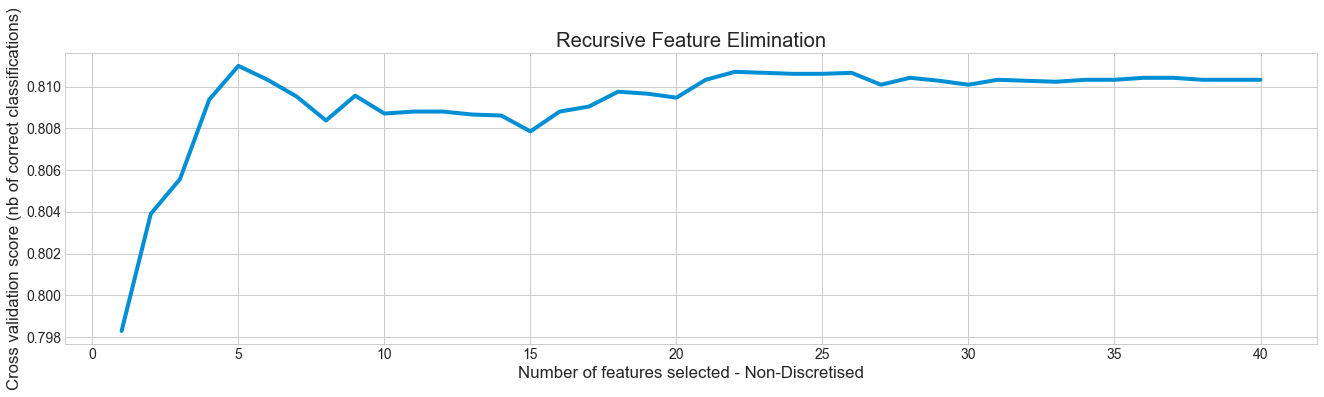

In [32]:
# rfe = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1).fit(X_tr2, y_tr)
# print("Feature Ranking For Non-Discretised: %s" % rfe.ranking_)
# print("Optimal number of features : %d" % rfe.n_features_)

# plt.style.use('seaborn-whitegrid')
# plt.figure(figsize=(20,5)) 
# plt.xlabel("Number of features selected - Non-Discretised")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
# plt.title("Recursive Feature Elimination")
# plt.savefig("../images/rfecv.png")

In [72]:
selected = X_train2.columns[rfe.support_]
print(selected)

Index(['limit', 'behind1', 'paid2', 'delayed', 'latemths'], dtype='object')


## <a id ='55'>Feature Selection Discussion</a>

** Observations: **

Top Features:

- Decision Tree Top 10: `behind1`, `age`, `latemnths`, `avail1`, `avail2`, `billed`, `avail5`, `limit`, `paid1`, `avg_av`....
- Random Forest Top 10: `behind1`, `age`, `latemnths`, `limit`, `avg_av`, `avail1`, `billed1`, `delayed`, `avail2`, `behind2`....
- XGBoost FI: `delayed`, `behind1`. (also `latemths`, `behind2`)
- RFECV: `limit`, `behind1`, `paid2`, `delayed`, `latemths`

Features to Remove:

- `age_bin`, `gender`, `marriage`, `gen-age`, `gen-mar`, `behind6`, `behind5`, `behind4`, `education`

# <a id='6'>New Baseline Model</a>

## Importing and Preparing Data

In [67]:
pickle_in = open("../data/training_model.pickle","rb")
train3 = pickle.load(pickle_in)
pickle_in = open("../data/validate_model.pickle","rb")
validate3 = pickle.load(pickle_in)

In [68]:
train3.head()

,limit,behind1,paid2,delayed,latemths,age,behind2,billed1,avg_av,avail1,default
0,1790.26,0,179.13,0,0,44,0,1631.93,0.344578,0.088440,0
1,5728.83,-1,173.87,0,0,46,-1,891.69,0.957227,0.844350,0
2,3580.52,-1,0.00,0,0,47,-1,238.68,0.968650,0.933339,1
3,6086.88,0,89.26,0,0,29,0,2831.87,0.650602,0.534758,0
4,5370.78,-2,1171.37,0,0,33,-2,873.40,0.836153,0.837379,0


In [69]:
X_train3 = train3.drop(["default"], axis=1)
y_tr = train3["default"]
X_validate3 = validate3.drop(["default"], axis=1)
y_val = validate3["default"]

In [70]:
scaler3 = StandardScaler().fit(X_train3)
X_tr3 = scaler3.transform(X_train3)
X_val3 = scaler3.transform(X_validate3)

## <a id='61'>Logistic Regression</a>

In [71]:
logreg3 = LogisticRegression(solver="liblinear", random_state=42).fit(X_tr3, y_tr)
y_pred_log_tr3 = logreg3.predict(X_tr3)
y_pred_log_val3 = logreg3.predict(X_val3)
get_metric(X_tr3, y_tr, X_val3, y_val, y_pred_log_tr3, y_pred_log_val3, logreg3)

Training Accuracy:  0.8087142857142857
Validation Accuracy:  0.8071666666666667
Training F1 Score:  0.40320903283316006
Validation F1 Score:  0.380952380952381
Training AUC Score:  0.7476973931814779
Validation AUC Score:  0.7467118706421856
Training Recall Score:  0.2914518900343643
Validation Recall Score:  0.27113480578827115
Training Precision Score:  0.6539759036144578
Validation Precision Score:  0.6402877697841727
Training Average Precision Score:  0.5205178998021469
Validation Average Precision Score:  0.4986664247114438


## <a id='62'>Random Forest Classifier</a>

In [72]:
rfc3 = RandomForestClassifier().fit(X_tr3, y_tr)
y_pred_rfc_tr3 = rfc3.predict(X_tr3)
y_pred_rfc_val3 = rfc3.predict(X_val3)
get_metric(X_tr3, y_tr, X_val3, y_val, y_pred_rfc_tr3, y_pred_rfc_val3, rfc3)

Training Accuracy:  0.9977142857142857
Validation Accuracy:  0.8115
Training F1 Score:  0.9948331539289559
Validation F1 Score:  0.46168491194669214
Training AUC Score:  0.9998826902229221
Validation AUC Score:  0.7489167669126138
Training Recall Score:  0.9924828178694158
Validation Recall Score:  0.3693830921553694
Training Precision Score:  0.9971946482520501
Validation Precision Score:  0.6154822335025381
Training Average Precision Score:  0.999539670247164
Validation Average Precision Score:  0.49245877813017913


## <a id='63'>Adaboost Classifier</a>

In [73]:
abc3 = AdaBoostClassifier().fit(X_tr3, y_tr)
y_pred_abc_tr3 = abc3.predict(X_tr3)
y_pred_abc_val3 = abc3.predict(X_val3)
get_metric(X_tr3, y_tr, X_val3, y_val, y_pred_abc_tr3, y_pred_abc_val3, abc3)

Training Accuracy:  0.8198571428571428
Validation Accuracy:  0.8201666666666667
Training F1 Score:  0.4594942134590656
Validation F1 Score:  0.4486458865610629
Training AUC Score:  0.7893082894108286
Validation AUC Score:  0.7755197365759127
Training Recall Score:  0.34536082474226804
Validation Recall Score:  0.33434881949733436
Training Precision Score:  0.6862996158770807
Validation Precision Score:  0.6816770186335404
Training Average Precision Score:  0.5532244939087803
Validation Average Precision Score:  0.5316937834705276


## <a id='64'>Gradient Boosting Classifier</a>

In [74]:
gbc3 = GradientBoostingClassifier().fit(X_tr3, y_tr)
y_pred_gbc_tr3 = gbc3.predict(X_tr3)
y_pred_gbc_val3 = gbc3.predict(X_val3)
get_metric(X_tr3, y_tr, X_val3, y_val, y_pred_gbc_tr3, y_pred_gbc_val3, gbc3)

Training Accuracy:  0.8282380952380952
Validation Accuracy:  0.8205
Training F1 Score:  0.5007612456747405
Validation F1 Score:  0.46603867129400095
Training AUC Score:  0.8058958222423227
Validation AUC Score:  0.7801567785407646
Training Recall Score:  0.38853092783505155
Validation Recall Score:  0.357958872810358
Training Precision Score:  0.7041650447644998
Validation Precision Score:  0.6676136363636364
Training Average Precision Score:  0.5995620569915905
Validation Average Precision Score:  0.5428456029515855


## <a id='65'>XGBoost Classifier</a>

In [75]:
xgb3 = XGBClassifier().fit(X_tr3, y_tr)
y_pred_xgb_tr3 = xgb3.predict(X_tr3)
y_pred_xgb_val3 = xgb3.predict(X_val3)
get_metric(X_tr3, y_tr, X_val3, y_val, y_pred_xgb_tr3, y_pred_xgb_val3, xgb3)

[11:47:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.8701904761904762
Validation Accuracy:  0.8141666666666667
Training F1 Score:  0.633897394574268
Validation F1 Score:  0.45530043966780653
Training AUC Score:  0.9149842497136311
Validation AUC Score:  0.7609757734402053
Training Recall Score:  0.506872852233677
Validation Recall Score:  0.3549124143183549
Training Precision Score:  0.8458781362007168
Validation Precision Score:  0.6348773841961853
Training Average Precision Score:  0.7992798465711681
Validation Average Precision Score:  0.5086303048484369


## <a id='66'>Evaluation Metrics</a>

In [76]:
data = {'Accuracy': [accuracy(y_val, y_pred_log_val3), 
                     accuracy(y_val, y_pred_rfc_val3), 
                     accuracy(y_val, y_pred_abc_val3), 
                     accuracy(y_val, y_pred_gbc_val3),
                     accuracy(y_val, y_pred_xgb_val3)],
        'F1 Score': [f1(y_val, y_pred_log_val3), 
                     f1(y_val, y_pred_rfc_val3), 
                     f1(y_val, y_pred_abc_val3), 
                     f1(y_val, y_pred_gbc_val3),
                     f1(y_val, y_pred_xgb_val3)],
        'Recall': [recall(y_val, y_pred_log_val3), 
                   recall(y_val, y_pred_rfc_val3), 
                   recall(y_val, y_pred_abc_val3),
                   recall(y_val, y_pred_gbc_val3),
                   recall(y_val, y_pred_xgb_val3)],
        'Precision': [precision(y_val, y_pred_log_val3), 
                      precision(y_val, y_pred_rfc_val3), 
                      precision(y_val, y_pred_abc_val3),
                      precision(y_val, y_pred_gbc_val3),
                      precision(y_val, y_pred_xgb_val3)],
        'PR AUC': [aps(X_val3, y_val, logreg3),
                   aps(X_val3, y_val, rfc3),
                   aps(X_val3, y_val, abc3),
                   aps(X_val3, y_val, gbc3),
                   aps(X_val3, y_val, xgb3)]}
new_baseline = pd.DataFrame(data=data, index = ['Logistic Regression New Baseline', 
                                                'Random Forest New Baseline', 
                                                'AdaBoost New Baseline', 
                                                'Gradient Boosting New Baseline',
                                                'XGBoost New Baseline'])
                                    

In [77]:
new_baseline

,Accuracy,F1 Score,Recall,Precision,PR AUC
Logistic Regression New Baseline,0.807167,0.380952,0.271135,0.640288,0.498666
Random Forest New Baseline,0.811500,0.461685,0.369383,0.615482,0.492459
AdaBoost New Baseline,0.820167,0.448646,0.334349,0.681677,0.531694
Gradient Boosting New Baseline,0.820500,0.466039,0.357959,0.667614,0.542846
XGBoost New Baseline,0.814167,0.455300,0.354912,0.634877,0.508630


In [78]:
new_baseline.to_csv("../data/new_baseline.csv")

** Observations: **

- Brought it down to top 10 features
- Gradient Boosting has the highest PR AUC Score as well as the highest F1 Score, so we are maximizing Recall and Precision in this model
